<a href="https://colab.research.google.com/github/laraccano84/Mentoria_mumuki/blob/main/entrega_1_cambio_de_nombres_de_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd
import seaborn
import requests
import json
import math       

seaborn.set_context('talk')

In [2]:
url='https://raw.githubusercontent.com/Natali-PP/diplodatos2021/main/mentoria/python_submissions.csv'
df = pd.read_csv(url)

Queriendo analizar la cantidad de estudiantes por leccion y ejercicio, nos encontramos con una situación peculiar.

Al agruparlo, vimos que existen tres casos en donde dos ejercicios tienen el mismo `exercise_eid`

*   *'¿Es par?'* y *'Libros de la buena memoria'*
*   *'Más booleanos'* y *'El retorno del booleano'*
*   *'PIenso que así es más fácil'* y *'Pienso que así es más fácil' *



In [3]:
df['date']= pd.to_datetime(df['submission_created_at']).dt.date
df.groupby(['guide_slug','exercise_eid','exercise_name']).agg({'date':'max','student_uid':'count'})

date  student_uid
guide_slug                                         exercise_eid exercise_name                                       
mumukiproject/mumuki-guia-python-funciones-tipo... 1            Funciones, declaración       2020-11-23         1069
                                                   2            Funciones, uso               2020-11-23         1221
                                                   3            Los premios                  2020-11-23         1347
                                                   4            Libros de la buena memoria   2020-11-23          892
                                                                ¿Es par?                     2019-12-09          381
                                                   5            Tipos de datos               2020-11-23         1327
                                                   6            Booleanos                    2020-11-23         1275
                                                   7            El retorno del booleano      2020-11-23         1307
                                                                Más booleanos                2019-11-21          235
                                                   8            Haciendo cuentas             2020-11-23         1909
                                                   9            Calefones                    2019-09-23           97
                                                   11           ¿Y qué tal si...?            2020-11-23          956
                                                   12           ¿De qué signo sos?           2020-11-23         1553
                                                   13           Palabras, sólo palabras      2020-11-23         2610
                                                   14           Operando strings             2020-11-23         2168
                                                   15           ¡GRITAR!                     2020-11-23         1571
                                                   16           Probando funciones           2020-11-23          881
                                                   17           Poniendo topes               2020-11-23         1326
                                                   18           No tan distintos             2020-11-23          505
                                                   19           Datos de todo tipo           2020-11-23         1331
mumukiproject/mumuki-guia-python-practica-funci... 1            Comprando Hardware           2020-11-23          827
                                                   2            ¿Me conviene?                2020-11-23         2066
                                                   3            Triangulos                   2020-11-23          690
                                                   4            Cuadrados                    2020-11-23          626
                                                   5            ¿Está afinado?               2020-11-23          626
                                                   6            Cartelitos                   2020-11-23         1574
                                                   7            Más Cartelitos               2020-11-23         2125
                                                   8            Cartelitos óptimos           2020-11-23         1597
                                                   9            Cara o ceca                  2020-11-23          860
                                                   10           ¡Envido!                     2020-11-23          835
                                                   11           ¡Quiero retruco!             2020-11-23         1071
                                                   12           ¡Quiero vale cuatro!         2020-11-23          571
                                                   13           ¿Está cerca?                 2020-11-23         1197
mumu

Esto nos llamó la atención, y buscamos verificarlo con los ejercicios que apareceren si hacemos una llamada a la api de mumuki.

Para esto, vemos los ejercicos de la lección *mumukiproject/mumuki-guia-python-funciones-tipos-de-datos* y *'mumukiproject/mumuki-guia-python-variables-y-procedimientos'*



In [4]:
url_first_lesson = 'https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-funciones-tipos-de-datos'
data_first_lesson = requests.get(url_first_lesson)
available_data_first_lesson = data_first_lesson.json()

first_lesson_exercises=[ {"index":ind, "name":elem['name']} for ind,elem in enumerate(available_data_first_lesson['exercises'])]

url_third_lesson = 'https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-variables-y-procedimientos'
data_third_lesson = requests.get(url_third_lesson)
available_data_third_lesson = data_third_lesson.json()

third_lesson_exercises=[ {"index":ind, "name":elem['name']} for ind,elem in enumerate(available_data_third_lesson['exercises'])]

In [5]:
first_lesson_exercises

[{'index': 0, 'name': 'No tan distintos'},
 {'index': 1, 'name': 'Funciones, declaración'},
 {'index': 2, 'name': 'Funciones, uso'},
 {'index': 3, 'name': 'Probando funciones'},
 {'index': 4, 'name': 'Haciendo cuentas'},
 {'index': 5, 'name': 'Poniendo topes'},
 {'index': 6, 'name': 'Libros de la buena memoria'},
 {'index': 7, 'name': 'Booleanos'},
 {'index': 8, 'name': 'Palabras, sólo palabras'},
 {'index': 9, 'name': 'Operando strings'},
 {'index': 10, 'name': '¡GRITAR!'},
 {'index': 11, 'name': '¿Y qué tal si...?'},
 {'index': 12, 'name': '¿De qué signo sos?'},
 {'index': 13, 'name': 'El retorno del booleano'},
 {'index': 14, 'name': 'Los premios'},
 {'index': 15, 'name': 'Tipos de datos'},
 {'index': 16, 'name': 'Datos de todo tipo'}]

In [6]:
third_lesson_exercises

[{'index': 0, 'name': '¿Y el tablero?'},
 {'index': 1, 'name': 'Impresión por pantalla'},
 {'index': 2, 'name': 'Martin Fierro'},
 {'index': 3, 'name': '¿Y los procedimientos?'},
 {'index': 4, 'name': '¿Y el program?'},
 {'index': 5, 'name': 'Conversiones'},
 {'index': 6, 'name': 'El círculo de la vida'},
 {'index': 7, 'name': 'Pienso que así es más fácil'},
 {'index': 8, 'name': 'Esto no tiene valor'},
 {'index': 9, 'name': 'Variables globales'},
 {'index': 10, 'name': 'Volviéndonos ricos'},
 {'index': 11, 'name': '¿Y esto cuánto vale?'}]

Los ejercicios que obtenemos al llamar a la api son los más actualizados, del 2020. Esto nos ayudará en un futuro cuando analicemos el orden de los ejercicios, ya que la columna `exercise_eid` no esta ordenada ni refleja este orden.

De los tres casos, vemos que los ejercicios que corresponden al período 2019, 'PIenso que así es más fácil', 'Más booleanos' y '¿Es par?',  no aparecen en los ejercicios de la API.

###  'PIenso que así es más fácil'

Esto se trata de un typo, resuelto en el nombre del ejercicio del año 2020, por lo que considerarán como el mismo ejercicio.

### 'Es par?'

Queremos saber si los ejercicios son parecidos o no.

Vemos la lección 'Los libros de la buena memoria' en la página web de mumuki https://mumuki.io/mentoria-diplodatos/exercises/7523-programacion-imperativa-funciones-y-tipos-de-datos-libros-de-la-buena-memoria. Aquí, el ejercicio consta de escribir una función que toma un parámetro, se debe cumplir cierta condición y debe devolver un booliano.

Para ver de qué trataba el ejercicio 'Es par?', se clono el repositoria de la primer lección y se buscó un commit que pertenezca al periódo 2019. Se uso el commit `1f640862d43e2d8d7365a9ca9322546090275601`. 
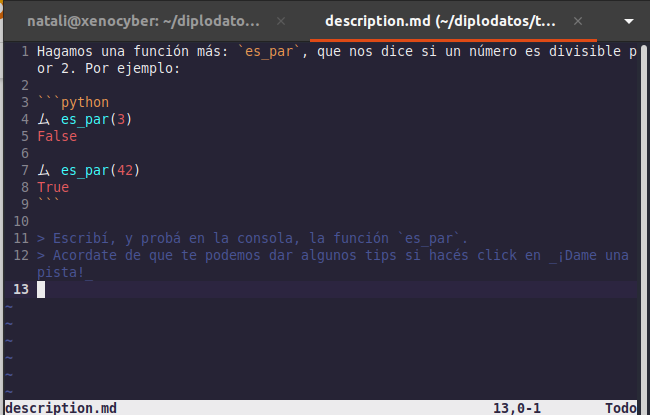


Este ejerccio busca que lxs users escriban una función a la que se le pasa un parámetro, checkear cierta condición y según esto, debe devolver un booleano.

En su escencia, los ejercicios buscan usar los mismos conceptos, por lo que se opto por considerarlos como el mismo ejercicio

### *'Más booleanos'* y *'El retorno del booleano'*

El ejercicio "El retorno del booleano" lo pudimos ver en la página de mumuki https://mumuki.io/mentoria-diplodatos/exercises/7534-programacion-imperativa-funciones-y-tipos-de-datos-el-retorno-del-booleano

Viendolo en el repositorio, el ejercicio 'Más booleanos' tiene la misma consigna, sólo que tiene un nombre diferente.

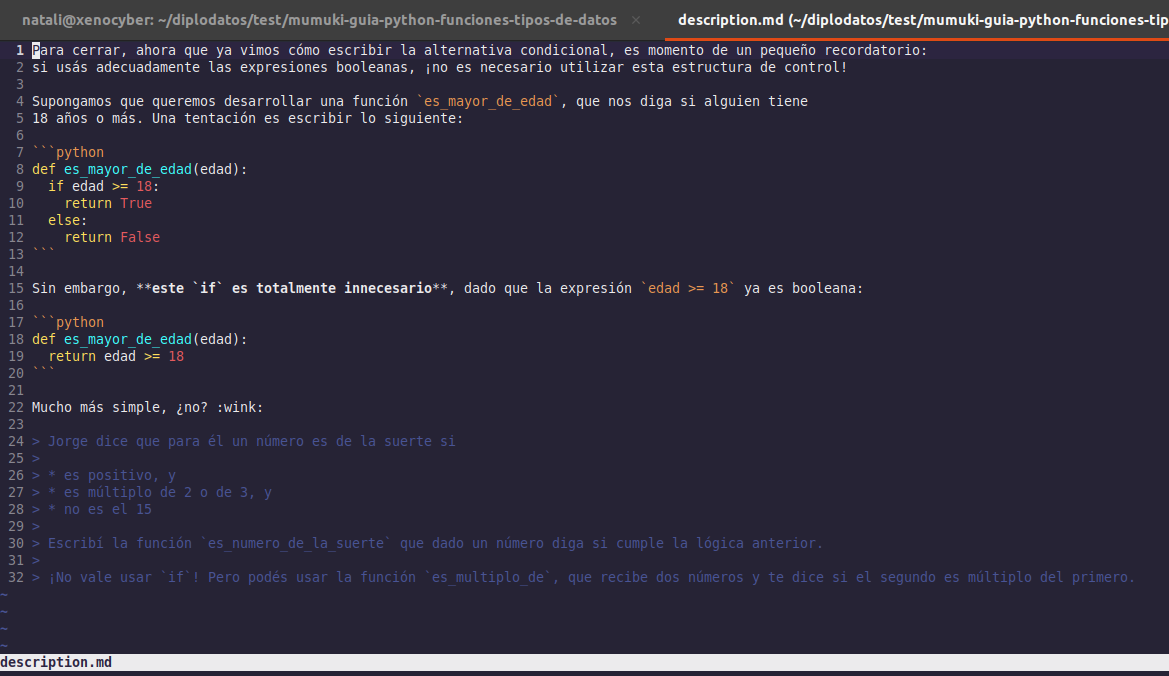

Teniendo en cuenta estos puntos, se deide agruparlos a todos como uno solo, teniendo el cuenta el nombre del ejercicio del año 2020 para que los datos del dataset estén coordinados con los que obtuvimos al hacer la llamada a la api.

In [7]:
df['exercise_name'] = df['exercise_name'].replace(
      {'PIenso que así es más fácil':'Pienso que así es más fácil', 
       '¿Es par?':'Libros de la buena memoria', 
       'Más booleanos' :'El retorno del booleano'
       })

In [8]:
df[df['exercise_name']=='¿Es par?']

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,date


In [9]:
df.groupby(['guide_slug','exercise_eid','exercise_name']).agg({'student_uid':'count'})

student_uid
guide_slug                                         exercise_eid exercise_name                           
mumukiproject/mumuki-guia-python-funciones-tipo... 1            Funciones, declaración              1069
                                                   2            Funciones, uso                      1221
                                                   3            Los premios                         1347
                                                   4            Libros de la buena memoria          1273
                                                   5            Tipos de datos                      1327
                                                   6            Booleanos                           1275
                                                   7            El retorno del booleano             1542
                                                   8            Haciendo cuentas                    1909
                                                   9            Calefones                             97
                                                   11           ¿Y qué tal si...?                    956
                                                   12           ¿De qué signo sos?                  1553
                                                   13           Palabras, sólo palabras             2610
                                                   14           Operando strings                    2168
                                                   15           ¡GRITAR!                            1571
                                                   16           Probando funciones                   881
                                                   17           Poniendo topes                      1326
                                                   18           No tan distintos                     505
                                                   19           Datos de todo tipo                  1331
mumukiproject/mumuki-guia-python-practica-funci... 1            Comprando Hardware                   827
                                                   2            ¿Me conviene?                       2066
                                                   3            Triangulos                           690
                                                   4            Cuadrados                            626
                                                   5            ¿Está afinado?                       626
                                                   6            Cartelitos                          1574
                                                   7            Más Cartelitos                      2125
                                                   8            Cartelitos óptimos                  1597
                                                   9            Cara o ceca                          860
                                                   10           ¡Envido!                             835
                                                   11           ¡Quiero retruco!                    1071
                                                   12           ¡Quiero vale cuatro!                 571
                                                   13           ¿Está cerca?                        1197
mumukiproject/mumuki-guia-python-variables-y-pr... 1            ¿Y el program?                       234
                                                   2            El círculo de la vida                709
                                                   3            Volviéndonos ricos                  1187
                                                   4            Variables globales                  1262
                                                   5            ¿Y los procedimientos?               236
                                                   6            ¿Y el tablero?                       50

## Ejercicios que aparecen en un año pero no aparecen en otro

### 'No tan distintos' / 'Funciones, declaración'


El ejercicio 'Funciones, declaración' en 2019, se separó en el 2020 en dos.  decidimos agruparlos juntos para no perder datos

In [10]:
df['exercise_name'] = df['exercise_name'].replace(
      {'Funciones, declaración': 'Funciones, declaración / No tan distintos','No tan distintos': 'Funciones, declaración / No tan distintos' })



### Calefones / Poniendo topes

En el año 2020 no existe un ejercicio que sea directamente comparable a 'Calefones'. El más cercano es el ejercicio 'Poniendo topes', ya que ambos tienen como consigna la creacion de una función que toma como parámetro dos enteros, y se debe realizar una operación aritmética para devolver otro entero.

La cantidad de datos del año 2019 es mucho menor que en 2020, y como no queremos perder datos, los decidimos agrupar dentro de 'Poniendo topes'

In [19]:
df['exercise_name'] = df['exercise_name'].replace(
      {'Calefones': 'Calefones / Poniendo topes',
       'Poniendo topes': 'Calefones / Poniendo topes'})

### 'Datos de todo tipo'

No existe en el año 2019 un ejercicio parecido a 'Datos de todo tipo'.
El más parecido es 'Tipo de datos', ya que los dos son ejercicios que buscan evaluar el entendimiento de los diferentes tipos de datos en Python de una manera más 'teórica', sin tener que escribir una función. Como no queremos perder datos, decidimos unificarlos en una sola categoría.



In [20]:
df['exercise_name'] = df['exercise_name'].replace(
      {'Datos de todo tipo': 'Tipos de datos / Datos de todo tipo',
       'Tipos de datos': 'Tipos de datos / Datos de todo tipo'})

In [21]:
df.groupby(['guide_slug','exercise_name']).agg({'student_uid':'count'})

student_uid
guide_slug                                         exercise_name                                         
mumukiproject/mumuki-guia-python-funciones-tipo... Booleanos                                         1275
                                                   Calefones / Poniendo topes                        1423
                                                   El retorno del booleano                           1542
                                                   Funciones, declaración / No tan distintos         1574
                                                   Funciones, uso                                    1221
                                                   Haciendo cuentas                                  1909
                                                   Libros de la buena memoria                        1273
                                                   Los premios                                       1347
                                                   Operando strings                                  2168
                                                   Palabras, sólo palabras                           2610
                                                   Probando funciones                                 881
                                                   Tipos de datos / Datos de todo tipo               2658
                                                   ¡GRITAR!                                          1571
                                                   ¿De qué signo sos?                                1553
                                                   ¿Y qué tal si...?                                  956
mumukiproject/mumuki-guia-python-practica-funci... Cara o ceca                                        860
                                                   Cartelitos                                        1574
                                                   Cartelitos óptimos                                1597
                                                   Comprando Hardware                                 827
                                                   Cuadrados                                          626
                                                   Más Cartelitos                                    2125
                                                   Triangulos                                         690
                                                   ¡Envido!                                           835
                                                   ¡Quiero retruco!                                  1071
                                                   ¡Quiero vale cuatro!                               571
                                                   ¿Está afinado?                                     626
                                                   ¿Está cerca?                                      1197
                                                   ¿Me conviene?                                     2066
mumukiproject/mumuki-guia-python-variables-y-pr... Conversiones                                      1513
                                                   El círculo de la vida                              709
                                                   Esto no tiene valor                                378
                                                   Impresión por pantalla                             509
                                                   Martin Fierro                                     1148
                                                   Pienso que así es más fácil                        365
                                                   Variables globales                                1262
                                                   Volviéndonos ricos                                1187
                                                   ¿Y el program? 